# Import Libraries 

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score


# Import and Read Dataset

In [2]:

df = pd.read_csv('/Users/mahaalatifi/Downloads/application_data.csv')


# First rows of Data
df.head(3)



,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## Data Dimensions

In [3]:

df.shape

#df.dtypes
#df.describe()

df['TARGET'].value_counts()


0    282686
1     24825
Name: TARGET, dtype: int64

# Cleaning Dataset


<b>Common data cleaning steps for the dataframe</b>
<ul><li>Check duplicated rows </li>
        <li> Drop dublicated rows </li>
    <li> Check missing values  </li>
    <li> Drop unused columns  </li> </ul>
 
    

## Check duplicated rows

In [4]:

# make copy for the original dataframe
df_copy = df.copy()


In [5]:
Duplicate = df_copy[df_copy.duplicated()]
  
print("Duplicate Rows :")
  
# Print the result Dataframe
Duplicate


Duplicate Rows :


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR


In [6]:

# print count of the duplicated rows
len(df_copy[df_copy.duplicated()])


0

## Drop duplicated rows

In [7]:

# drop the duplicated rows
df_copy = df_copy.drop_duplicates()


## Check missing values (Percentage)

In [8]:

pd.set_option("display.max_rows", None, "display.max_columns", None)
display( round(100 * (df.isnull().sum() / len(df.index)),2) )


SK_ID_CURR                       0.00
TARGET                           0.00
NAME_CONTRACT_TYPE               0.00
CODE_GENDER                      0.00
FLAG_OWN_CAR                     0.00
FLAG_OWN_REALTY                  0.00
CNT_CHILDREN                     0.00
AMT_INCOME_TOTAL                 0.00
AMT_CREDIT                       0.00
AMT_ANNUITY                      0.00
AMT_GOODS_PRICE                  0.09
NAME_TYPE_SUITE                  0.42
NAME_INCOME_TYPE                 0.00
NAME_EDUCATION_TYPE              0.00
NAME_FAMILY_STATUS               0.00
NAME_HOUSING_TYPE                0.00
REGION_POPULATION_RELATIVE       0.00
DAYS_BIRTH                       0.00
DAYS_EMPLOYED                    0.00
DAYS_REGISTRATION                0.00
DAYS_ID_PUBLISH                  0.00
OWN_CAR_AGE                     65.99
FLAG_MOBIL                       0.00
FLAG_EMP_PHONE                   0.00
FLAG_WORK_PHONE                  0.00
FLAG_CONT_MOBILE                 0.00
FLAG_PHONE  


<b>Removing columns with missing values more than 40%</b>
<ul>  </ul>
 
    

In [9]:
df_copy = df_copy.drop(['OWN_CAR_AGE','OCCUPATION_TYPE','EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3',
                        'APARTMENTS_AVG','BASEMENTAREA_AVG','YEARS_BEGINEXPLUATATION_AVG','YEARS_BUILD_AVG',
                        'COMMONAREA_AVG','ELEVATORS_AVG','ENTRANCES_AVG','FLOORSMAX_AVG','FLOORSMIN_AVG',
                        'LANDAREA_AVG','LIVINGAPARTMENTS_AVG','LIVINGAREA_AVG','NONLIVINGAPARTMENTS_AVG',
                        'NONLIVINGAREA_AVG','APARTMENTS_MODE','BASEMENTAREA_MODE','YEARS_BEGINEXPLUATATION_MODE',
                        'YEARS_BUILD_MODE','COMMONAREA_MODE','ELEVATORS_MODE','ENTRANCES_MODE','FLOORSMAX_MODE',
                        'FLOORSMIN_MODE','LANDAREA_MODE','LIVINGAPARTMENTS_MODE','LIVINGAREA_MODE',
                        'NONLIVINGAPARTMENTS_MODE','NONLIVINGAREA_MODE','APARTMENTS_MEDI','BASEMENTAREA_MEDI',
                        'YEARS_BEGINEXPLUATATION_MEDI','YEARS_BUILD_MEDI','COMMONAREA_MEDI','ELEVATORS_MEDI',
                        'ENTRANCES_MEDI','FLOORSMAX_MEDI','FLOORSMIN_MEDI','LANDAREA_MEDI',
                        'LIVINGAPARTMENTS_MEDI','LIVINGAREA_MEDI','NONLIVINGAPARTMENTS_MEDI',
                        'NONLIVINGAREA_MEDI','FONDKAPREMONT_MODE','HOUSETYPE_MODE','TOTALAREA_MODE',
                        'WALLSMATERIAL_MODE','EMERGENCYSTATE_MODE'] , axis=1)

In [10]:
df_copy.shape

(307511, 70)

In [11]:

# Percentage of Null Values:
pd.set_option("display.max_rows", None, "display.max_columns", None)
display( round(100 * (df_copy.isnull().sum() / len(df_copy.index)),2) )


# Count of Null Values:
print(df_copy.isnull().sum())


SK_ID_CURR                      0.00
TARGET                          0.00
NAME_CONTRACT_TYPE              0.00
CODE_GENDER                     0.00
FLAG_OWN_CAR                    0.00
FLAG_OWN_REALTY                 0.00
CNT_CHILDREN                    0.00
AMT_INCOME_TOTAL                0.00
AMT_CREDIT                      0.00
AMT_ANNUITY                     0.00
AMT_GOODS_PRICE                 0.09
NAME_TYPE_SUITE                 0.42
NAME_INCOME_TYPE                0.00
NAME_EDUCATION_TYPE             0.00
NAME_FAMILY_STATUS              0.00
NAME_HOUSING_TYPE               0.00
REGION_POPULATION_RELATIVE      0.00
DAYS_BIRTH                      0.00
DAYS_EMPLOYED                   0.00
DAYS_REGISTRATION               0.00
DAYS_ID_PUBLISH                 0.00
FLAG_MOBIL                      0.00
FLAG_EMP_PHONE                  0.00
FLAG_WORK_PHONE                 0.00
FLAG_CONT_MOBILE                0.00
FLAG_PHONE                      0.00
FLAG_EMAIL                      0.00
C

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
FLAG_EMAIL                         0
C

In [12]:
print(type(df_copy.info()))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307511 entries, 0 to 307510
Data columns (total 70 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 


<b>Dealing with missing values</b>
<ul>  </ul>
 
    


<li> Now we have dropped {52} unused columns, since the Null values percentage for these columns is more than 40%</li>

<li>Moreover, we have now {70} columns, {12} of them have percentage of Null values less than 40% and we need to handle them.</li>

<li>The rest of columns have 0% of Null values </li>

<ul>  </ul>

<b>  </b> 
    

# Features Understanding


<b>The dataset contain all the information of the client at the time of application for loan. The data is about whether a client has payment difficulties or NOT</b>

<ul> Therefore, we have column "TARGET", that will predict to minimise the risk of losing money while lending to customers. 
</ul>

<ul> Moreover, it contains two options:</ul>
<ul> <b>1</b> :Client with payment difficulties: he/she had late payment more than X days. "Defaulter"

<b>0</b> : All other cases when the payment is paid on time. "Non-Defaulter" </ul>


<b>
    Distribution of Target variable
</b>
 

Text(0.5, 1.0, 'Count of Target variable')

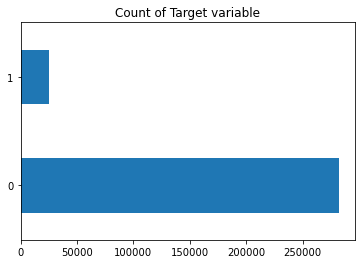

In [64]:
T1 = df_copy["TARGET"].value_counts().plot(kind="barh")
#for i,j in enumerate(df_copy["TARGET"].value_counts().values):
 #   T1.text(0.5,i,j,fontsize=20)
plt.title("Count of Target variable")

Text(0.5, 1.0, 'Percentage of Target variable')

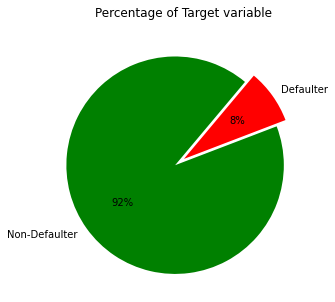

In [47]:
T2 = df_copy["TARGET"].value_counts().plot.pie(labels=["Non-Defaulter","Defaulter"],startangle = 50,label='',
                                          wedgeprops={"linewidth":5},center=(0, 0),colors = ["Green","Red"],
                                          rotatelabels=False,explode=[0.1,0],autopct = "%1.0f%%",figsize=(5,5))
plt.title("Percentage of Target variable")


<b>
    Distribution of [NAME_CONTRACT_TYPE] variable
</b>
 

In [20]:
df['NAME_CONTRACT_TYPE'].unique()

array(['Cash loans', 'Revolving loans'], dtype=object)

Text(0.5, 1.0, 'Percentage of NAME_CONTRACT_TYPE variable')

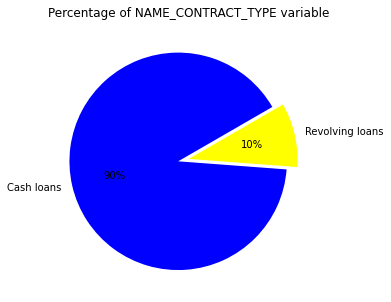

In [51]:
NCT = df_copy["NAME_CONTRACT_TYPE"].value_counts().plot.pie(labels=["Cash loans","Revolving loans"],
                                                            startangle = 30,wedgeprops={"linewidth":5},
                                                            center=(0, 0),colors = ["Blue","Yellow"],
                                                            rotatelabels=False,explode=[0.1,0],
                                                            autopct = "%1.0f%%",figsize=(5,5),label='')
plt.title("Percentage of NAME_CONTRACT_TYPE variable")


<b>
    Distribution of [Amount Data] variable:
</b>
    <li> [AMT_INCOME_TOTAL]: income of the client
    <li> [AMT_CREDIT]: credit amount of the loan
    <li> [AMT_ANNUITY]: loan annuity
    <li> [AMT_GOODS_PRICE]: for consumer loans it is the price of the goods for which the loan is given
</li>

 

In [ ]:
#AD = df_copy[['AMT_INCOME_TOTAL', 'AMT_CREDIT','AMT_ANNUITY', 'AMT_GOODS_PRICE']]
#plt.subplot(4, 4, AD)
#plt.show()

In [ ]:
AD = df_copy[['AMT_INCOME_TOTAL', 'AMT_CREDIT','AMT_ANNUITY', 'AMT_GOODS_PRICE']].value_counts().plot(kind="bar")
#for i,j in enumerate(df_copy["TARGET"].value_counts().values):
 #   T1.text(0.5,i,j,fontsize=20)
plt.title("Count of Target variable")

## Features Correlation

In [ ]:
print(type(df_copy.info()))